## 30900_evans_0827_4

In [5]:
%%html
<!--마크다운 표 정렬 설정-->
<style> table {float:left} </style>

| 함수       | 기능               |
|------------|--------------------|
| head()     | 앞부분 출력        |
| tail()     | 뒷부분 출력        |
| shape      | 행, 열 개수 출력   |
| info()     | 변수 속성 출력     |
| describe() | 요약 통계량 출력   |

In [12]:
import pandas as pd
import numpy as np
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2  # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


<Axes: ylabel='Frequency'>

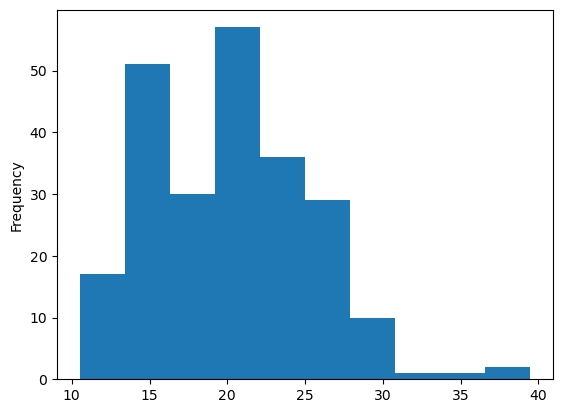

In [16]:
# 막대 그래프 만들기
mpg['total'].plot.hist()

In [18]:
# 20 이상이면 pass, 그렇지 않으면 fail 부여 np.where = if
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass


In [20]:
# 연비 합격 비도표 만들기

mpg['test'].value_counts()

test
pass    128
fail    106
Name: count, dtype: int64

<Axes: xlabel='test'>

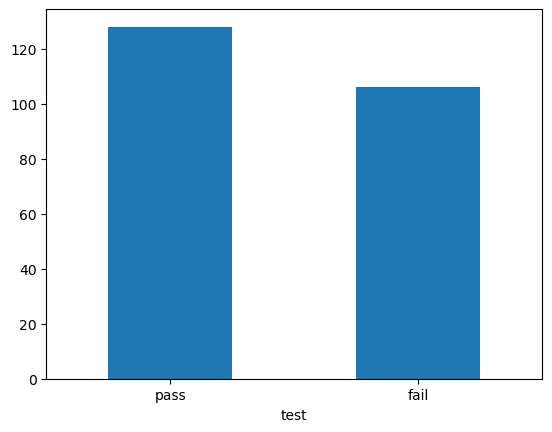

In [24]:
count_test = mpg['test'].value_counts()
count_test.plot.bar(rot=0)

In [26]:
# 문제 total 기준으로 A,B,C등급 A 30이상 B 20이상 나머지는 C
# colum name grade
mpg['grade'] = np.where( mpg['total'] >= 30, 'A',
                          np.where( mpg['total'] >=20, 'B', 'C'))

mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B


In [30]:
count_grade = mpg['grade'].value_counts().sort_index()
count_grade

grade
A     10
B    118
C    106
Name: count, dtype: int64

<Axes: xlabel='grade'>

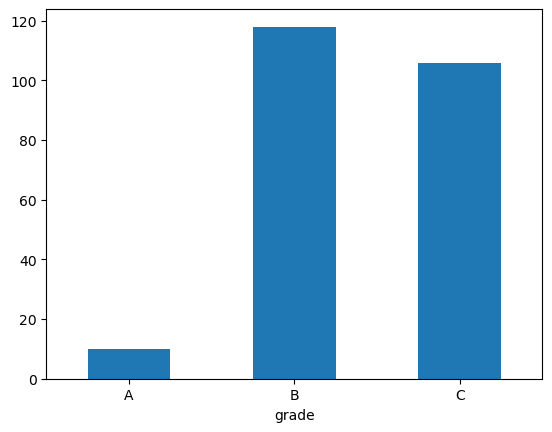

In [32]:
# 등급 빈도 막대 그래프 만들기
count_grade.plot.bar(rot=0)

In [34]:
#문제 A,B,C,D등겹 만들기 
# grade2  where 30 A 25 B 20 C 나머지 D
mpg['grade2'] = np.where(mpg['total'] >= 30, 'A',
                            np.where(mpg['total'] >= 25, 'B',
                            np.where(mpg['total'] >= 20, 'C', 'D')))

In [36]:
count_grade2 = mpg['grade2'].value_counts().sort_index()
count_grade2

grade2
A     10
B     33
C     85
D    106
Name: count, dtype: int64

<Axes: xlabel='grade2'>

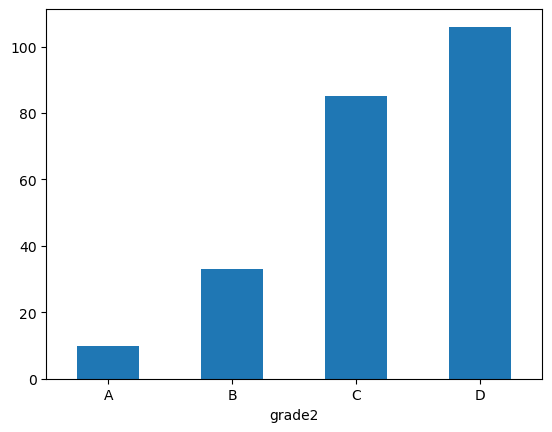

In [38]:
count_grade2.plot.bar(rot=0)

| 함수          | 기능              |
|---------------|-------------------|
| query()       | 행 추출           |
| df[]          | 열(변수) 추출     |
| sort_values() | 정렬              |
| groupby()     | 집단별로 나누기   |
| agg()         | 통계치 구하기     |
| merge()       | 데이터 합치기(열) |
| concat()      | 데이터 합치기(행) |

In [41]:
exam = pd.read_csv('exam.csv')
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [47]:
# exam에서 nclass =1 경우만 추출
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [49]:
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [51]:
# 문제 1반을 제외한 나머지 출력
exam.query('nclass != 1')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
